
Random Forest Regression Feature Ranking:

                   Feature    Importance
2         RETAIL TRANSFERS  9.682529e-01
3          WAREHOUSE SALES  7.092191e-03
4                ITEM_CODE  5.955273e-03
5         ITEM_DESCRIPTION  5.778101e-03
1                    MONTH  4.691701e-03
6             SUPPLIER_Enc  3.529827e-03
12  ITEM TYPE_STR_SUPPLIES  1.933745e-03
0                     YEAR  1.906117e-03
13          ITEM TYPE_WINE  3.020569e-04
10        ITEM TYPE_LIQUOR  2.998914e-04
7           ITEM TYPE_BEER  2.120273e-04
11   ITEM TYPE_NON-ALCOHOL  4.536186e-05
9           ITEM TYPE_KEGS  8.182356e-07
8        ITEM TYPE_DUNNAGE  3.905711e-09

R² Score: 0.9596
Mean Absolute Error (MAE): 1.5247
Mean Squared Error (MSE): 32.6850


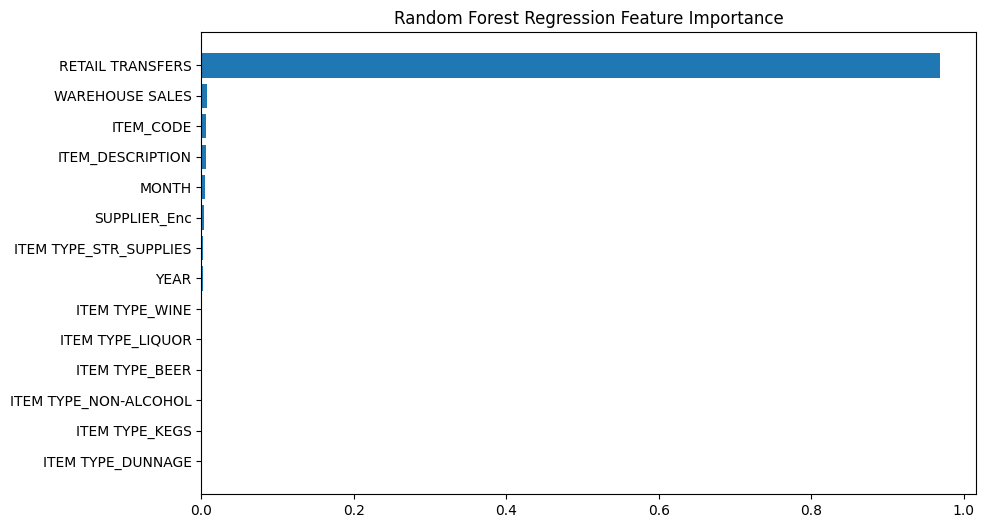

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("encoded_retail_data.csv")

# 2. Define target column 
target_col = "RETAIL SALES"

X = df.drop(columns=[target_col])
y = df[target_col]


# RandomForest
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
problem_type = "regression"

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Fit model
model.fit(X_train, y_train)

# 6. Feature importance ranking
importances = model.feature_importances_
feature_names = X.columns

ranking = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(f"\nRandom Forest {problem_type.capitalize()} Feature Ranking:\n")
print(ranking)

# 7. Performance check
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nR² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 8. Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(ranking["Feature"], ranking["Importance"])
plt.gca().invert_yaxis()
plt.title(f"Random Forest {problem_type.capitalize()} Feature Importance")
plt.show()
